In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Load the dataset into 'df'
file_path = '/content/kidney_disease.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')>


In [ ]:
 ckd_frame = pd.DataFrame(df, columns=df.columns) # creating a dataframe with the  information.

In [ ]:
ckd_frame.info() #some of the data is str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.shape


(400, 26)

In [ ]:
# Step 2: Display the first few rows of the dataset to understand its structure
print(df.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [ ]:
# Step 3: Check for missing values and data types
missing_values = df.isnull().sum()  #  the number of missing values for each feature

print(missing_values)  #  the number of missing values for each feature





id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [ ]:
#Get data type
data_types = df.dtypes
print(data_types)

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [ ]:
# Step 4: Drop the 'id' column as it is not useful for the model
df = df.drop(columns=['id'])

In [ ]:
 #checking to see if the id column was removed
 print(df.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [ ]:
# Step 5: Handle missing values
# Separate features into numerical and categorical
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns


In [ ]:
# Impute missing values
# Numerical features: Impute with mean
# Categorical features: Impute with mode

#need to oberserve the data

df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])


In [ ]:
# Verify if all missing values have been handled
missing_values_after = df.isnull().sum()
print("\nMissing Values After Imputation:\n", missing_values_after)


Missing Values After Imputation:
 age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [ ]:
# Step 6: Convert incorrectly labeled numerical features to numeric types
# Features "pcv", "wc", "rc" should be numeric
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['htn'] = pd.to_numeric(df['htn'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')
df['dm'] = pd.to_numeric(df['dm'], errors='coerce')
df['cad'] = pd.to_numeric(df['cad'], errors='coerce')
df['appet'] = pd.to_numeric(df['appet'], errors='coerce')
df['pe'] = pd.to_numeric(df['pe'], errors='coerce')
df['ane'] = pd.to_numeric(df['ane'], errors='coerce')
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')



In [ ]:
#Any new NaN values that may have resulted from conversion issues
df[['pcv','htn', 'wc', 'rc','dm','cad','appet','pe','ane','classification']] = df[['pcv','htn', 'wc', 'rc','dm','cad','appet','pe','ane','classification']].fillna(df[['pcv','htn', 'wc', 'rc','dm','cad','appet','pe','ane','classification']].mode()) # filled all the nan columns with the mode/ not the mean


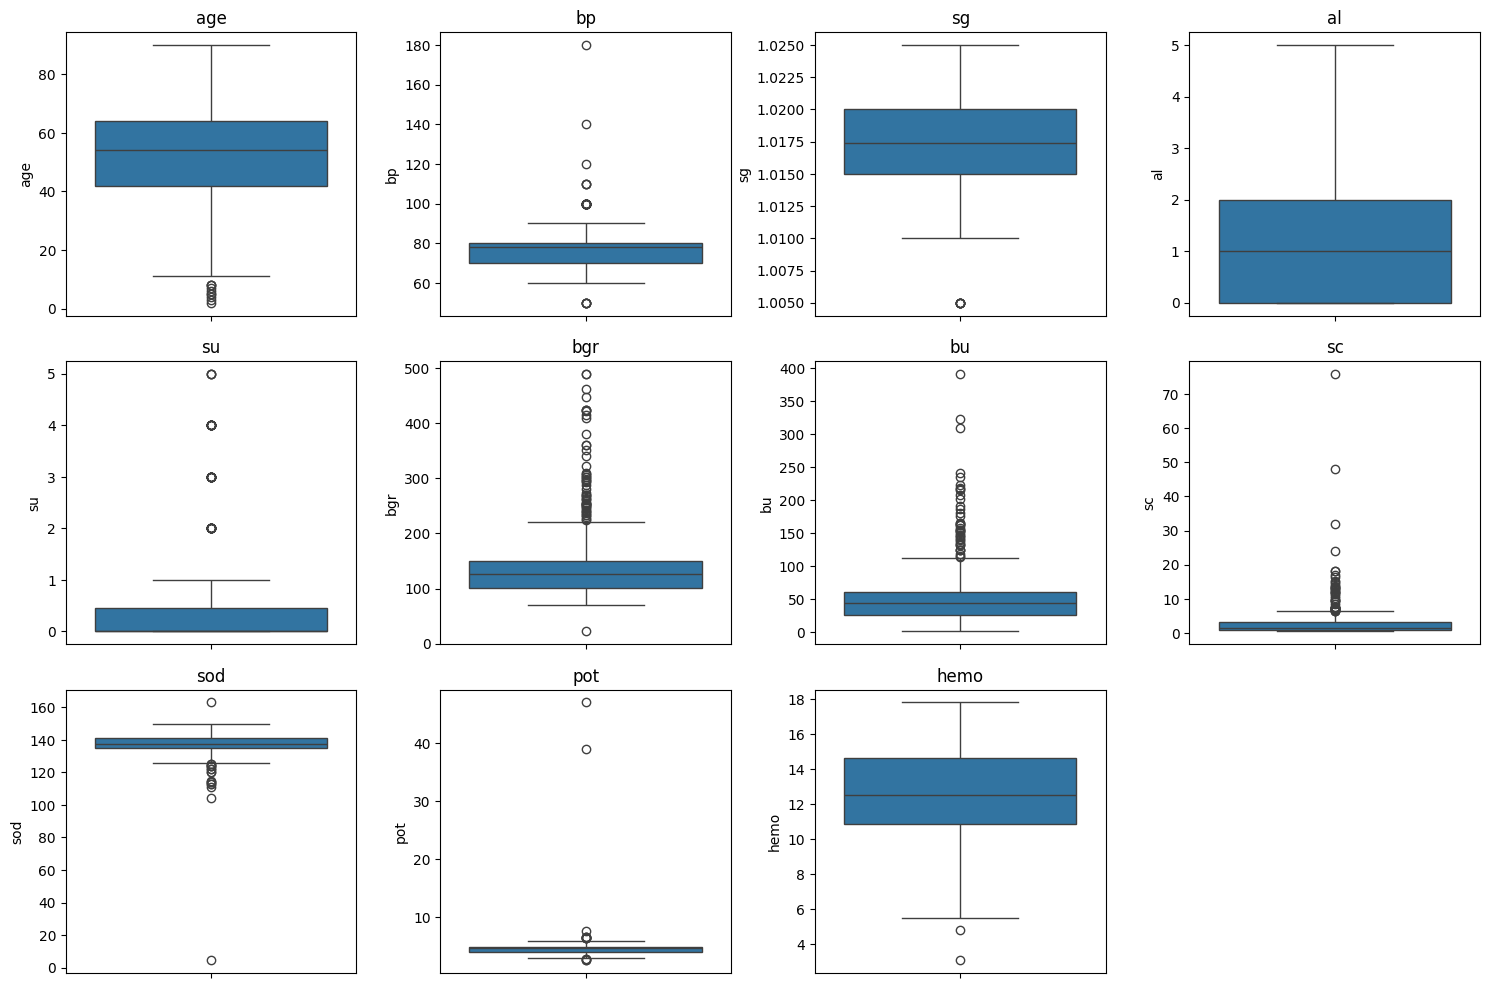

In [ ]:
# Step 8: Use boxplots to visualize outliers in numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(df[feature])
    plt.title(feature)


plt.tight_layout()
plt.show()


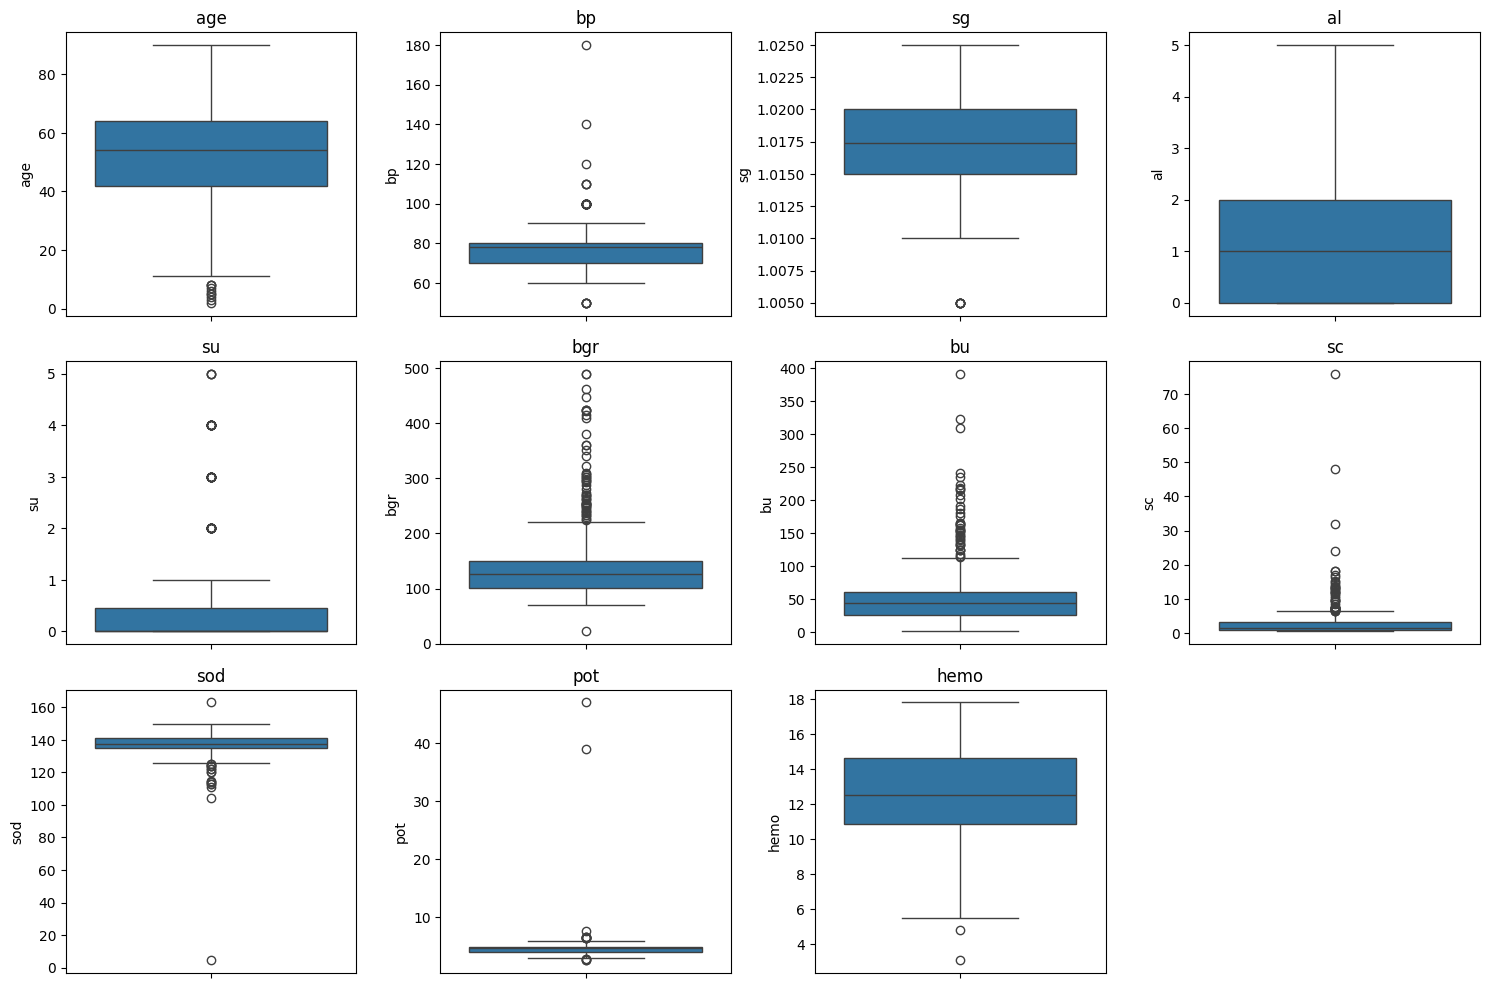

In [ ]:
# Step 8: Use boxplots to visualize outliers in numerical features
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 4  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)  # Use calculated rows and columns
    sns.boxplot(df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Assuming 'X' is your original DataFrame containing all features and the target
# If 'X' is not your original DataFrame, replace it with the correct one

# Access features and target directly from the original DataFrame (X)
features_to_use = categorical_features.tolist()  # Convert Index to list
features_to_use.remove('classification') if 'classification' in features_to_use else features_to_use #remove the target variable from features to use if it exists

X_subset = X[features_to_use] # features to use
y = X['classification']  # Assuming 'classification' is the target column

# Convert string columns to numerical using Label Encoding
for col in X_subset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_subset[col] = le.fit_transform(X_subset[col])

# Apply chi-squared test
chi2_selector = SelectKBest(chi2, k=2)  # Select top 2 features
X_reduced = chi2_selector.fit_transform(X_subset, y)

print("Original shape:", X_subset.shape)
print("Reduced shape:", X_reduced.shape)

KeyError: 'classification'

In [32]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Define the original DataFrame with features and target
# Assume 'df' is the original DataFrame containing all features and the target

# Extract feature columns (categorical ones for chi-squared test)
# Replace 'categorical_features' with the actual list of categorical columns if undefined
categorical_features = df.select_dtypes(include=['object']).columns

# Remove target column from features
features_to_use = categorical_features.tolist()
if 'classification' in features_to_use:
    features_to_use.remove('classification')

# Subset of features for chi-squared test
X_subset = df[features_to_use].copy()
y = df['classification']

# Convert categorical features to numeric
for col in X_subset.columns:
    le = LabelEncoder()
    X_subset[col] = le.fit_transform(X_subset[col])

# Ensure the target is also numeric, encode if necessary
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Apply chi-squared test to select top 2 features
chi2_selector = SelectKBest(chi2, k=2)
X_reduced = chi2_selector.fit_transform(X_subset, y)

print("Original shape:", X_subset.shape)
print("Reduced shape:", X_reduced.shape)

KeyError: 'classification'

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

# Step 1: Load Data
data = load_iris(as_frame=True)
df = data.frame
df.columns = data.feature_names + ["target"]

# For binary classification, we select only two target classes for simplicity
df = df[df["target"] != 2]  # Remove one class (Iris Virginica) for binary classification

# Step 2: Data Preprocessing
# Separate features and target
X = df[data.feature_names]  # Features
y = df["target"]  # Target

# Optional: Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Choose and Train the Model
model = LogisticRegression()  # Logistic Regression is good for binary classification
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Step 6: Making Predictions on New Data
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example feature set
new_data_scaled = scaler.transform(new_data)  # Apply the same scaling as training data
prediction = model.predict(new_data_scaled)
print("Prediction for new data:", prediction)


Accuracy: 1.0
Confusion Matrix:
 [[17  0]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Prediction for new data: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


This dataset is moderately imbalanced. Since chronic kidney disease prediction is sensitive to imbalances, it's usually best to address this by balancing the data or applying techniques like class weighting during model training.

For binary classification, algorithms like Logistic Regression or Random Forest are good starting points. I'll use Random Forest because it's robust, handles imbalanced data well with class weighting, and often provides good accuracy with limited tuning.